# Some KDE figures from the lectures for Week 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

makePDF=False

Before doing anything else, we make sure there's a directory to receive the figures we'll plot.

In [2]:
# https://www.tutorialspoint.com/How-can-I-create-a-directory-if-it-does-not-exist-using-Python
import os
if not os.path.exists('Figures'):
    os.makedirs('Figures')

## One dimensional KDE: convergence

The aim here is to show that, as one adds more data, the kernel density estimate converges to the distribution from which the data were drawn.

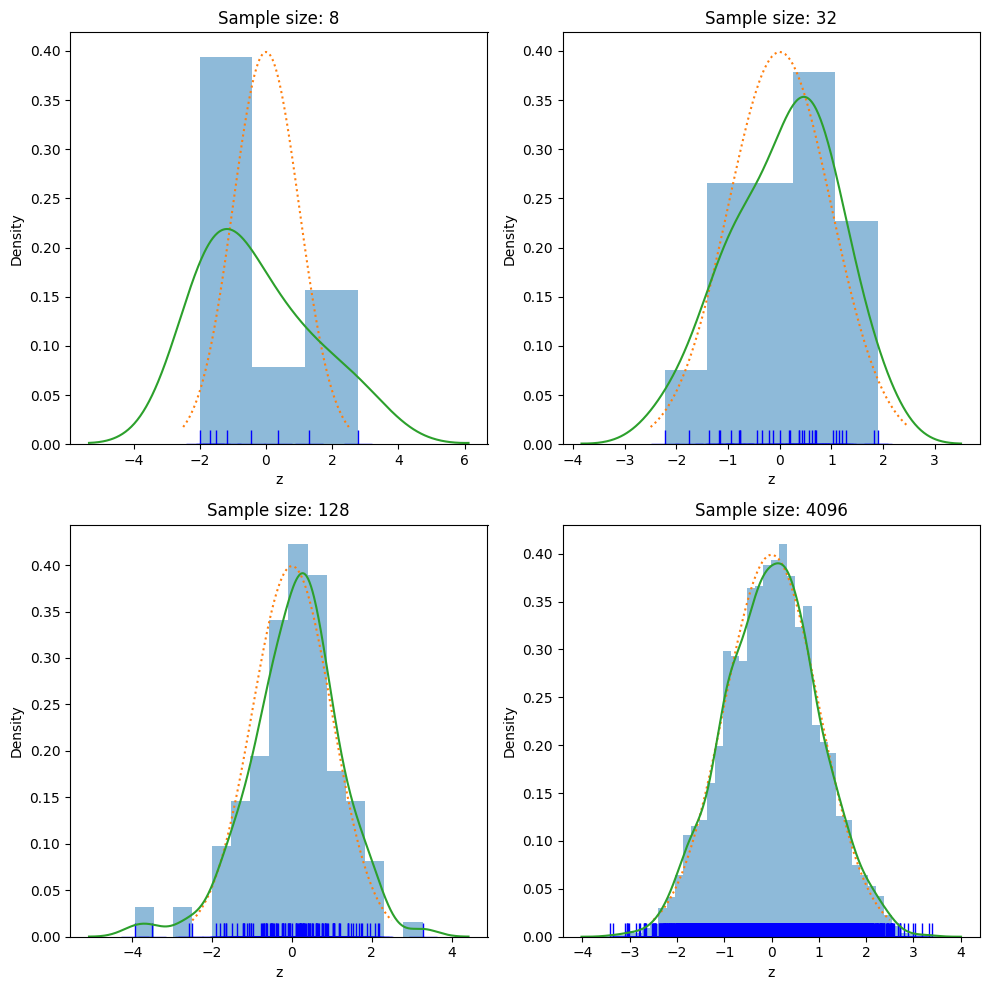

In [3]:
import math # for floor()
from scipy.stats import norm # to compute the true density
from statsmodels.nonparametric.kde import KDEUnivariate

# Choose a range of sample sizes to use when building the KDE
sampleSize = [8, 32, 128, 4096]

# Prepare to draw the true distribution
nTicks = 100
zVals = np.linspace( -2.5, 2.5, nTicks+1 )
truePdfVals = np.zeros( len(zVals) )
for j in range(0, len(zVals)):
    truePdfVals[j] = norm.pdf( zVals[j] )

# Set up the plot
kdeFig, kdeAxes = plt.subplots(2, 2, figsize=[10,10])

# Construct the estimates in turn
nSizes = len(sampleSize)
pdfVals = np.zeros( [nTicks, nSizes] )
for j in range(0, nSizes):
    # Generate the sample
    crntSize = sampleSize[j]
    crntSample = np.random.normal( 0, 1, crntSize )
    
    # Fit the KDE
    crnt_kde = KDEUnivariate( crntSample )
    crnt_kde.fit()
    
    # Plot that puppy, along with the data and the true distribution
    row = math.floor( j / 2 )
    col = j % 2 
    kdeAxes[row, col].hist( crntSample, bins="fd", density=True, alpha=0.5 )
    kdeAxes[row, col].plot(crntSample, np.zeros(crntSize), 'b+', ms=20) # rug
    kdeAxes[row, col].plot( zVals, truePdfVals, ':'  )
    kdeAxes[row, col].plot( crnt_kde.support, crnt_kde.density )
    kdeAxes[row, col].set_xlabel('z')
    kdeAxes[row, col].set_ylabel('Density' )
    kdeAxes[row, col].set_title( 'Sample size: ' + str(crntSize) )

plt.tight_layout() # Avoid overlapping labels

# If desired, make a pdf version too
if( makePDF ):
    plt.savefig('Figures/KDE_convergenceExample.pdf')

## One dimensional KDEs: for illustration

Compare histogram, KDE and true distribution for a very small sample of points, so that one can see the contributions of the individual kernel-bumps ot the whole estimate.

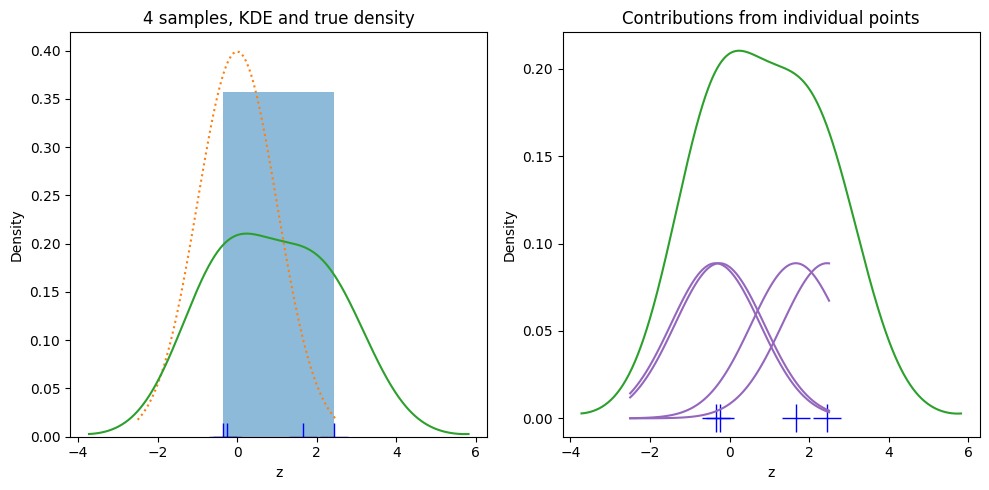

In [4]:
# Set up the plot
kdeIdeaFig, kdeAxes = plt.subplots(1, 2, figsize=[10, 5])

# Construct the estimates in turn
sampleSize = 4
crntSample = np.random.normal( 0, 1, sampleSize )
    
# Fit the KDE and make a note of the bandwidth
crnt_kde = KDEUnivariate( crntSample )
crnt_kde.fit()
crntBw = crnt_kde.bw
    
# Plot that puppy, along with the data and the true distribution
kdeAxes[0].hist( crntSample, bins="fd", density=True, alpha=0.5 )
kdeAxes[0].plot( crntSample, np.zeros(sampleSize), 'b+', ms=20) # rug
kdeAxes[0].plot( zVals, truePdfVals, ':'  )
kdeAxes[0].plot( crnt_kde.support, crnt_kde.density )
kdeAxes[0].set_xlabel('z')
kdeAxes[0].set_ylabel('Density' )
kdeAxes[0].set_title( str(sampleSize) + ' samples, KDE and true density'  )

# Also plot the individual bumps
kdeAxes[1].plot( crntSample, np.zeros(sampleSize), 'b+', ms=20) # rug
kdeAxes[1].plot( crnt_kde.support, crnt_kde.density, 'C2' )
kdeAxes[1].set_xlabel('z')
kdeAxes[1].set_ylabel('Density' )
kdeAxes[1].set_title( 'Contributions from individual points'  )
for j in range(0, sampleSize ):
    # Evaluate the contribution due to the kernel on the j-th sample
    bumpVals = np.zeros( len(zVals) ) 
    for k in range(0, len(zVals)):
        bumpVals[k] = norm.pdf( zVals[k], crntSample[j], crntBw ) / sampleSize
    
    # Add it to the plot
    kdeAxes[1].plot( zVals, bumpVals, 'C4' )

plt.tight_layout() # Avoid overlapping labels

# If desired, make a pdf version too
if( makePDF ):
    plt.savefig('Figures/KDE_ideaExample.pdf')

## Pillow plot of a few samples

This is an alternative approach to the question addressed above: how do the individual contributions to the KDE pile up to produce the whole density estimate?

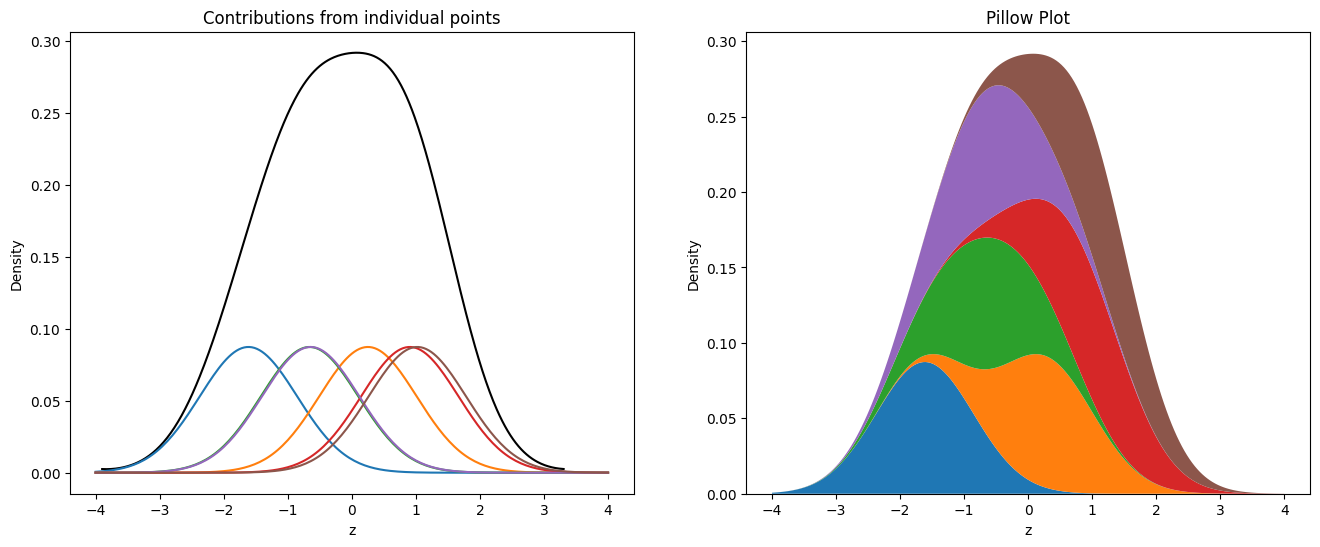

In [5]:
# Set up the plot
kdeIdeaFig, kdeAxes = plt.subplots(1, 2, figsize=[16, 6])

# Arrange the data in an order that may help highlght
# the way the contributions add up. This is a somewhat 
# arbitrary choice.
sampleSize = 6 # should be even
halfSampleSize = int(sampleSize/2)
sortedSample = sorted( np.random.normal( 0, 1, sampleSize ) )
crntSample = np.zeros(sampleSize)
for j in range(halfSampleSize):
    crntSample[2*j] = sortedSample[j]
    crntSample[2*j+1] = sortedSample[j+halfSampleSize]
    
# Fit the KDE and make a note of the bandwidth
crnt_kde = KDEUnivariate( crntSample )
crnt_kde.fit()
crntBw = crnt_kde.bw

# Get ready to build an array whose columns give bump shapes
nTicks = 200
zVals = np.linspace( -4, 4, nTicks+1 )
bumpShapes = np.zeros( (sampleSize, len(zVals)) )

# Plot the full desnity estimate, along with the bumps for the
# individual data points.
kdeAxes[0].plot( crnt_kde.support, crnt_kde.density, 'black' )
kdeAxes[0].set_xlabel('z')
kdeAxes[0].set_ylabel('Density' )
kdeAxes[0].set_title( 'Contributions from individual points'  )
for j in range(0, sampleSize ):
    # Evaluate the contribution due to the kernel sitting on the j-th sample
    for k in range(0, len(zVals)):
        bumpShapes[j,k] = norm.pdf( zVals[k], crntSample[j], crntBw ) / sampleSize
    
    # Add it to the plot
    colorStr = 'C' + str(j)
    kdeAxes[0].plot( zVals, bumpShapes[j,:], colorStr )
    
# Plot the stacked pillows
kdeAxes[1].set_xlabel('z')
kdeAxes[1].set_ylabel('Density' )
kdeAxes[1].set_title( 'Pillow Plot'  )
kdeAxes[1].stackplot( zVals, bumpShapes )

# If desired, make a pdf version too
if( makePDF ):
    plt.savefig('Figures/KDE_PillowPlot.pdf')